In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import os
import pandas as pd
import seaborn as sns
from datetime import datetime
from scipy import stats

mpl.rcParams['figure.figsize'] = (18, 6)
mpl.rcParams['axes.grid'] = False

I am choosing the time interval by how many days with no collected days. Choose by the most used periods could insert some type of bias on the data.

In [2]:
timeRange = []

# EVO data

In [3]:
def cleaning(data):
    # only travels with more than 30 minutes of duration, that is the limit of cancellation of a reserve
    data = data.loc[(data['duration'] > 30) | (data['distance'] > 3)]

    data.Start_time = pd.to_datetime(data.Start_time)
    data.End_time = pd.to_datetime(data.End_time)

    # Colleting vehicle ids
    car_ids = list(data.Id.unique())

    # Removing uncommon ids
    # Ex: 4c5865a3-4b03-40f6-a3a8-d4e94aae3b17
    ids_uncommon = [id for id in car_ids if id.find('-') != -1]
    car_ids = [id for id in car_ids if id.find('-') == -1]

    data = data.loc[~data.Id.isin(ids_uncommon)]
    
    # Removing microseconds from the dates
    data.Start_time = data.Start_time.apply(lambda x: x.replace(microsecond=0))
    data.End_time = data.End_time.apply(lambda x: x.replace(microsecond=0))
    
    return data

In [4]:
evo_data = pd.read_csv('data/evo_travels.csv')

In [5]:
#cleaning process
evo_data = cleaning(evo_data)

C:\Users\lrpes\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [6]:
evo_data.head()

,Id,Start_time,Start_lat,Start_lon,Fuel_start,End_time,End_lat,End_lon,Fuel_end,duration,distance
0,JTDKDTB32G1589000,2018-03-01 12:42:24,49.225563,-122.894234,84,2018-03-01 13:21:04,49.314045,-123.083481,84,38.657753,1.688120e+04
2,JTDKDTB32G1589000,2018-03-01 18:36:09,49.314045,-123.083481,84,2018-03-01 20:24:36,49.315067,-123.083481,83,108.456289,1.136032e+02
3,JTDKDTB32G1589000,2018-03-01 20:39:21,49.315067,-123.083481,83,2018-03-01 21:09:48,49.315067,-123.083481,83,30.452687,7.068790e-10
5,JTDKDTB32G1589000,2018-03-01 21:18:46,49.315067,-123.083481,83,2018-03-01 21:33:18,49.327805,-123.081482,83,14.545000,1.422821e+03
6,JTDKDTB32G1589000,2018-03-02 04:36:32,49.327805,-123.081482,83,2018-03-02 05:02:50,49.288547,-123.119751,80,26.307881,5.169018e+03


C:\Users\lrpes\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


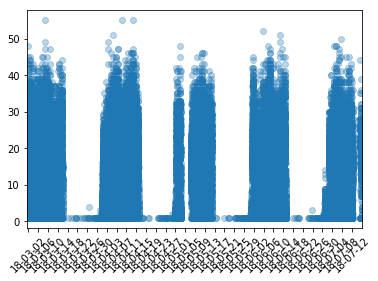

In [7]:
travel_count = evo_data.Start_time.value_counts(sort=False)
travel_count = travel_count[(np.abs(stats.zscore(travel_count)) < 3)]

fig, ax = plt.subplots(1,1)
ax.scatter(travel_count.index, travel_count.values, alpha=0.3)

ax.set_xlim(travel_count.index.min(), travel_count.index.max())
plt.xticks(rotation=45)
# ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=4))   #to get a tick every 15 minutes
ax.xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d'))     #optional formatting 
plt.show()

EVO certainly is the hardest dataset to find a consistent time interval, since it has many whole during the months. So, the best intervals are:
* 2018-03-01 to 2018-03-16 = 15 days
* 2018-03-24 to 2018-04-16 = 22 days
* 2018-05-25 to 2018-06-15 = 21 days

In [8]:
timeRange.append(["Evo", evo_data.Start_time.min(), evo_data.Start_time.max()])

# Modo data

In [9]:
modo_data = pd.read_csv('data/modo_travels.csv')

In [10]:
modo_data.start = modo_data.start.apply(lambda x: datetime.fromtimestamp(x))
modo_data.end = modo_data.end.apply(lambda x: datetime.fromtimestamp(x))

In [11]:
modo_data.head()

,car_id,start,end,duration
0,255,2018-03-02 10:30:36,2018-03-02 12:00:47,90.183333
1,255,2018-03-03 06:45:58,2018-03-03 09:30:49,164.850000
2,255,2018-03-03 11:30:55,2018-03-03 15:00:08,209.216667
3,255,2018-03-03 19:45:59,2018-03-03 22:45:16,179.283333
4,255,2018-03-04 07:30:33,2018-03-04 12:30:59,300.433333


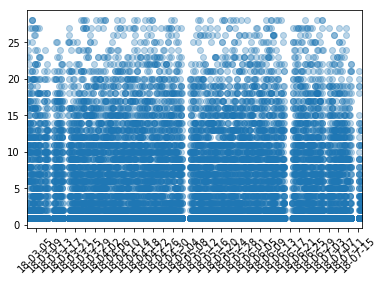

In [12]:
travel_count = modo_data.start.value_counts(sort=False)
travel_count = travel_count[(np.abs(stats.zscore(travel_count)) < 3)]

fig, ax = plt.subplots(1,1)
ax.scatter(travel_count.index, travel_count.values, alpha=0.3)

ax.set_xlim(travel_count.index.min(), travel_count.index.max())
plt.xticks(rotation=45)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=4))   #to get a tick every 15 minutes
ax.xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d'))     #optional formatting 
plt.show()

In [13]:
timeRange.append(["Modo", modo_data.start.min(), modo_data.start.max()])

Modo has a more consistent data intervals, with at least 3 intervals possible intervals.
* 2018-03-18 to 2018-05-04 = 47 days
* 2018-05-07 to 2018-06-15 = 39 days
* 2018-06-17 to 2018-07-12 = 25 days

# Car2Go data

In [14]:
c2g_data = pd.read_csv('data/car2go_travels.csv', index_col=0)

C:\Users\lrpes\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [15]:
c2g_data.init_time = c2g_data.init_time.apply(lambda x: datetime.fromtimestamp(x))
c2g_data.final_time = c2g_data.final_time.apply(lambda x: datetime.fromtimestamp(x))

In [16]:
c2g_data

,start_lat,start_lon,init_time,end_lat,end_lon,final_time,duration,distance
0,49.26637,-123.11597,2016-12-13 14:39:08,49.27269,-123.13606,2016-12-13 14:45:19,371,1617
1,49.28008,-123.11194,2016-12-13 14:38:23,49.26637,-123.11597,2016-12-13 14:49:24,661,1551
2,49.26948,-123.13282,2016-12-13 14:40:42,49.28101,-123.10971,2016-12-13 14:50:58,616,2109
3,49.26732,-123.10673,2016-12-13 14:49:24,49.26440,-123.13509,2016-12-13 14:55:43,379,2081
4,49.28730,-123.12509,2016-12-13 14:40:42,49.26952,-123.09601,2016-12-13 14:57:16,994,2889
5,49.28410,-123.06545,2016-12-13 14:46:14,49.26986,-123.10667,2016-12-13 14:58:02,708,3381
6,49.26505,-123.06876,2016-12-13 14:38:23,49.25966,-123.11997,2016-12-13 14:58:47,1224,3761
7,49.27073,-123.14824,2016-12-13 14:46:14,49.26637,-123.11597,2016-12-13 14:59:32,798,2389
8,49.26427,-123.12267,2016-12-13 14:38:23,49.27832,-123.11465,2016-12-13 15:00:17,1314,1666
9,49.28327,-123.12146,2016-12-13 14:47:46,49.26510,-123.10681,2016-12-13 15:01:02,796,2281


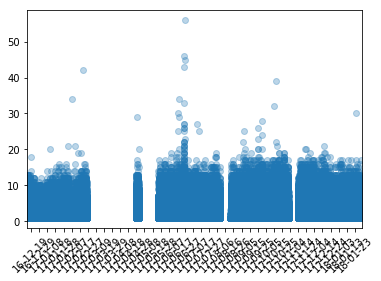

In [17]:
travel_count = c2g_data.init_time.value_counts(sort=False)
#travel_count = travel_count[(np.abs(stats.zscore(travel_count)) < 3)]

fig, ax = plt.subplots(1,1)
ax.scatter(travel_count.index, travel_count.values, alpha=0.3)

ax.set_xlim(travel_count.index.min(), travel_count.index.max())
plt.xticks(rotation=45)
# ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))   #to get a tick every 15 minutes
ax.xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d'))     #optional formatting 
plt.show()

Car2Go have some large intervals without data, but clear 4 intervals could be used.
* 2016-12-18 to 2017-02-27 = 68 days
* 2017-05-21 to 2017-08-11 = 82 days
* 2017-08-21 to 2017-11-04 = 75 days
* 2017-11-12 to 2018-02-02 = 76 days

In [18]:
timeRange.append(["Car2Go", c2g_data.init_time.min(), c2g_data.init_time.max()])

In [19]:
timeRange

[['Evo', Timestamp('2018-03-01 08:26:55'), Timestamp('2018-07-15 23:51:35')],
 ['Modo', Timestamp('2018-03-01 05:30:52'), Timestamp('2018-07-16 14:50:47')],
 ['Car2Go',
  Timestamp('2016-12-13 14:38:23'),
  Timestamp('2018-01-31 10:51:54')]]

In [20]:
common_min = max(list(map(lambda x: x[1], timeRange[:1])))
common_max = min(list(map(lambda x: x[2], timeRange[:1])))

print("Min: ", common_min, "Max:", common_max)

Min:  2018-03-01 08:26:55 Max: 2018-07-15 23:51:35


# Interval Search

As the common range between Evo and Modo is (2018-03-01 08\:26:55 ; 2018-07-15 23\:51:35) this is the range we are going to look for a interval in them, and as Car2Go has no overlapping range this year, but it has the entire year of 2017, we are going to use (2017-03-01 08\:26:55 ; 2017-07-15 23\:51:35) as its base for comparisons instead

In [21]:
evo_interval = evo_data.Start_time.value_counts(sort=False) # Getting the value_counts
evo_interval = evo_interval[(np.abs(stats.zscore(evo_interval)) < 3)] # Cleaning the outliers
evo_interval = pd.DataFrame(evo_interval).rename(columns={"Start_time":"Start"}) # Transforming into a DataFrame in the right format
evo_interval = evo_interval[((common_min <= evo_interval.index) & (evo_interval.index<= common_max))] # Filtering the range
evo_interval["Origin"] = "Evo"
evo_interval.head()

,Start,Origin
2018-04-07 00:33:04,6,Evo
2018-03-09 16:04:39,3,Evo
2018-07-06 17:35:58,39,Evo
2018-07-12 03:06:08,1,Evo
2018-03-13 03:12:11,2,Evo


In [22]:
modo_interval = modo_data.start.value_counts(sort=False) # Getting the value_counts
modo_interval = modo_interval[(np.abs(stats.zscore(modo_interval)) < 3)] # Cleaning the outliers
modo_interval = pd.DataFrame(modo_interval).rename(columns={"start":"Start"}) # Transforming into a DataFrame in the right format
modo_interval = modo_interval[((common_min <= modo_interval.index) & (modo_interval.index<= common_max))] # Filtering the range
modo_interval["Origin"] = "Modo"
modo_interval.head()

,Start,Origin
2018-06-23 19:15:36,7,Modo
2018-07-03 11:45:12,5,Modo
2018-03-05 14:21:59,1,Modo
2018-07-07 20:30:20,3,Modo
2018-04-16 04:32:36,1,Modo


In [23]:
c2g_interval = c2g_data.init_time.value_counts(sort=False) # Getting the value_counts
c2g_interval = c2g_interval[(np.abs(stats.zscore(c2g_interval)) < 3)] # Cleaning the outliers
c2g_interval = pd.DataFrame(c2g_interval).rename(columns={"init_time":"Start"}) # Transforming into a DataFrame in the right format
c2g_interval["Date"] = c2g_interval.index
c2g_interval.index = c2g_interval.apply(lambda x: x.Date + pd.DateOffset(months = 12), axis=1)
c2g_interval = c2g_interval.drop(columns=["Date"])
c2g_interval = c2g_interval[((common_min <= c2g_interval.index) & (c2g_interval.index<= common_max))] # Filtering the range
c2g_interval["Origin"] = "Car2Go"
c2g_interval.head()

,Start,Origin
2018-06-22 02:18:44,2,Car2Go
2018-05-26 18:50:11,7,Car2Go
2018-06-24 15:33:34,5,Car2Go
2018-04-29 10:51:42,2,Car2Go
2018-07-06 23:18:48,7,Car2Go


After taking the intervals needed they are being appended into the same DataFrame. After that they are divided in cell by their average travel count by day by Company

In [24]:
general_interval = evo_interval.append(modo_interval).append(c2g_interval)
general_interval.index.name = "Date"
general_interval = general_interval.reset_index()
general_interval.head()

,Date,Start,Origin
0,2018-04-07 00:33:04,6,Evo
1,2018-03-09 16:04:39,3,Evo
2,2018-07-06 17:35:58,39,Evo
3,2018-07-12 03:06:08,1,Evo
4,2018-03-13 03:12:11,2,Evo


In [25]:
mean_general_interval = general_interval.groupby([general_interval['Date'].dt.strftime('%m-%d'), "Origin"]).mean()["Start"].unstack()
mean_general_interval.Car2Go /= mean_general_interval.Car2Go.max()
mean_general_interval.Evo /= mean_general_interval.Evo.max()
mean_general_interval.Modo /= mean_general_interval.Modo.max()
mean_general_interval.head()

Origin,Car2Go,Evo,Modo
Date,,,
03-01,NaN,0.995003,0.939197
03-02,NaN,0.931313,0.882225
03-03,NaN,0.914516,0.924043
03-04,NaN,0.831439,0.948867
03-05,NaN,0.799903,0.918766


In [26]:
mgi = mean_general_interval.reset_index().reset_index().rename(columns={"index":"DayNumber"})
mgi.head()

Origin,DayNumber,Date,Car2Go,Evo,Modo
0,0,03-01,NaN,0.995003,0.939197
1,1,03-02,NaN,0.931313,0.882225
2,2,03-03,NaN,0.914516,0.924043
3,3,03-04,NaN,0.831439,0.948867
4,4,03-05,NaN,0.799903,0.918766


In [27]:
mgi= mgi.dropna()
mgi

Origin,DayNumber,Date,Car2Go,Evo,Modo
56,56,04-27,0.892227,0.050818,0.832223
58,58,04-29,0.933294,0.058077,0.960955
59,59,04-30,0.797063,0.083418,0.929910
60,60,05-01,0.501646,0.830698,0.935736
82,82,05-25,0.875645,0.050818,0.857702
83,83,05-26,0.895930,0.050818,0.823284
84,84,05-27,0.741742,0.050818,0.823604
88,88,05-31,0.835595,0.083849,0.931999
89,89,06-01,0.848220,0.956506,0.872565
90,90,06-02,0.885404,0.850369,0.903429


Now we will test for sequences of days

In [28]:
def sequence_finder(data: list, max_diff: int):
    sequences = []
    start_sequence = []
    for day in data:
        if len(start_sequence) == 0:
            start_sequence.append(day)
            start_sequence.append(day)
        else:
            if(day - start_sequence[1] > max_diff):
                sequences.append(start_sequence.copy())
                start_sequence[0] = day
                start_sequence[1] = day
            else:
                start_sequence[1] = day
    sequences.append(start_sequence.copy())
                
    sequences = list(map(lambda x: [x[0], x[1], x[1]-x[0]], sequences))
    sequences.sort(key=lambda x: x[2], reverse=True)
    return sequences

In [29]:
max0empty = list(map(lambda x: ["Start Date: " + str(mgi.loc[x[0]].Date), "End Date: " + str(mgi.loc[x[1]].Date), "Sequence Length: " + str(x[2])], sequence_finder(mgi.DayNumber, 1)))
max1empty = list(map(lambda x: ["Start Date: " + str(mgi.loc[x[0]].Date), "End Date: " + str(mgi.loc[x[1]].Date), "Sequence Length: " + str(x[2])], sequence_finder(mgi.DayNumber, 2)))
max2empty = list(map(lambda x: ["Start Date: " + str(mgi.loc[x[0]].Date), "End Date: " + str(mgi.loc[x[1]].Date), "Sequence Length: " + str(x[2])], sequence_finder(mgi.DayNumber, 3)))
max3empty = list(map(lambda x: ["Start Date: " + str(mgi.loc[x[0]].Date), "End Date: " + str(mgi.loc[x[1]].Date), "Sequence Length: " + str(x[2])], sequence_finder(mgi.DayNumber, 4)))

So the results for the best sequence of days is:

In [30]:
print("The best sequence for a maximum of 0 dataless days inbetween is:", max0empty[0])
print("The best sequence for a maximum of 1 dataless days inbetween is:", max1empty[0])
print("The best sequence for a maximum of 2 dataless days inbetween is:", max2empty[0])
print("The best sequence for a maximum of 3 dataless days inbetween is:", max3empty[0])

The best sequence for a maximum of 0 dataless days inbetween is: ['Start Date: 06-23', 'End Date: 07-12', 'Sequence Length: 19']
The best sequence for a maximum of 1 dataless days inbetween is: ['Start Date: 06-23', 'End Date: 07-12', 'Sequence Length: 19']
The best sequence for a maximum of 2 dataless days inbetween is: ['Start Date: 05-31', 'End Date: 07-15', 'Sequence Length: 45']
The best sequence for a maximum of 3 dataless days inbetween is: ['Start Date: 05-25', 'End Date: 07-15', 'Sequence Length: 51']


## OBS:

https://stackoverflow.com/questions/52570199/multivariate-lstm-with-missing-values

Tenho que pegar intervalos de tempo semelhantes em inicio e fim para cada serviço? Ou a melhor 'temporada' do serviço?
Além disso, estou tentando pegar o máximo de dias possível, ou só uma semana é o suficiente? Ou até mesmo, porque não utilizar todos os dados?